### 数据集说明

本研究涉及5110人，其中女性2995人，男性2115人。本研究的数据集是从Kaggle数据存储库中提取的(https://www.kaggle.com/datasets网站)根据以下属性信息预测患者是否可能中风：


#### 项目背景
中风是一种医学疾病，由于流向大脑的血液不足导致细胞死亡。中风主要有两种类型：缺血性中风（缺乏血液流动导致）和出血性中风（出血导致）。两者都会导致大脑的某些部分停止正常运作。

中风的体征和症状可能包括一侧身体无法移动或感觉，理解或说话问题，头晕或一侧视力丧失。症状和体征通常在中风发生后不久就会出现。
如果症状持续不到一两个小时，中风就是短暂性脑缺血发作(TIA)，也称为小中风。
出血性中风还可能伴有严重的头痛。中风的症状可能是永久性的。长期并发症可能包括肺炎和膀胱失控。

中风的主要危险因素是高血压。
其他危险因素包括高血胆固醇、吸烟、肥胖、糖尿病、以前的TIA、终末期肾病和心房颤动。

缺血性中风通常是由血管堵塞引起的，尽管也有一些不太常见的原因。
出血性中风是由出血直接进入大脑或进入大脑膜之间的空间引起的。

出血可能是由于脑动脉瘤破裂引起的。诊断通常基于身体检查，并辅以医学成像，如CT扫描或MRI扫描。
CT扫描可以排除出血，但不一定排除缺血，早期的CT扫描通常不会显示缺血。其他检查，如心电图(ECG)和血液检查，以确定危险因素和排除其他可能的原因。低血糖也可能引起类似的症状。

数据说明
《中国成人超重和肥胖症预防控制指南》的BMI分类：
BMI	身体质量指数说明
①< 18.5	体重过轻
②18.5 - 23.9	体重正常
③24 - 27.9	超重
④> 28	肥胖
血糖水平
正常空腹血糖浓度的预期值介于 70 mg/dL 到 100 mg/dL 之间。
或：3.9 mmol/L 和 5.6 mmol/L 之间

1.  id                : unique identifier
2.  gender            : "Male", "Female" or "Other"
3.  age               : age of the patient
4.  hypertension      : 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5.  heart_disease     : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6.  ever_married      : "No" or "Yes"
7.  work_type         : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8.  Residence_type    : "Rural" or "Urban"
9.  avg_glucose_level : average glucose level in blood
10. bmi               : body mass index
11. smoking_status    : "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke            : 1 if the patient had a stroke, 0 the patient do not have a stroke

### 导入工具库和数据

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)
from sklearn.preprocessing import LabelEncoder

### 1.数据介绍

id: 唯一标识符。
gender: 性别，“男”、“女”或“其他”。
age: 患者年龄。
hypertension: 高血压：0如果患者没有高血压；1如果患者有高血压。
heart_disease: 心脏病: 0如果患者没有任何心脏病,1如果患者有心脏病。
ever_married: 曾经结过婚: “不”或“是”。
work_type: 工作类型: “孩子”，“政府工作”，“从不工作”，“私人”或“自营职业”。
Residence_type: 居住类型: “农村”或“城市”。
avg_glucose_level: 平均血糖水平: 血糖水平。
bmi: 体重指数: 身体质量指数。
somking_status: 吸烟状况: “曾经吸烟”,“从不吸烟”、“吸烟”或“不明”。
stroke: 中风: 1如果病人有中风，0如果没有。
注意: “不明”在吸烟状态意味着这个病人无法获得信息

In [2]:
df = pd.read_csv('C:/Users/86157/Desktop/data1.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
print('数据集包含的数据个数 {}.'.format(df.shape[0]))

数据集包含的数据个数 5110.


In [5]:
#为了方便处理，将gender中的male和female用1和0来代替
le = LabelEncoder()
df['gender_1'] = le.fit_transform(df["gender"].astype(str))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_1
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


### 2.数据清洗

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
gender_1               0
dtype: int64

#### 2.1 bmi数据处理

BMI特征中有201个缺失值。处理缺失值的一种简单方法是删除具有null值的行，但这可能会删除不为null的数据。因此，我们将用bmi平均值替换缺失值，并检查是否进行了插补。

"bmi"缺失的百分比 3.93%


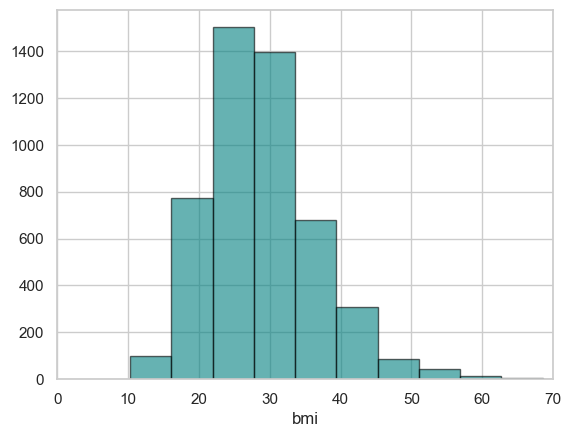

In [7]:
print('"bmi"缺失的百分比 %.2f%%' %((df['bmi'].isnull().sum()/df.shape[0])*100))
ax = df["bmi"].hist(bins=15, color='teal', alpha=0.6,edgecolor="black")
ax.set(xlabel='bmi')
plt.xlim(0,70)
plt.show()

In [8]:
# 求bmi的平均值并代替缺失值，检查是否取代成功
print('The mean of "bmi" is %.2f' %(df["bmi"].mean(skipna=True)))
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.isnull().sum()

The mean of "bmi" is 28.89


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
gender_1             0
dtype: int64

#### 2.2 id数据处理

唯一id的总数与行计数相同。我们不需要另一个标识符。因此，我们将删除此列。

In [9]:
df.id.nunique()
df = df.drop(columns ='id')
df.shape

(5110, 12)

#### 2.3 gender数据处理

In [10]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

性别需要归类为二元变量。从分析的角度来看，为一个行值（“其他”）创建另一个变量是很不必的。因此，我们将使用此列中的模式插补此单个值。

In [11]:
df['gender'] = df['gender'].replace('Other', list(df.gender.mode().values)[0])
df.gender.value_counts()

gender
Female    2995
Male      2115
Name: count, dtype: int64

### 3.数据分析

#### 3.1 数据总览

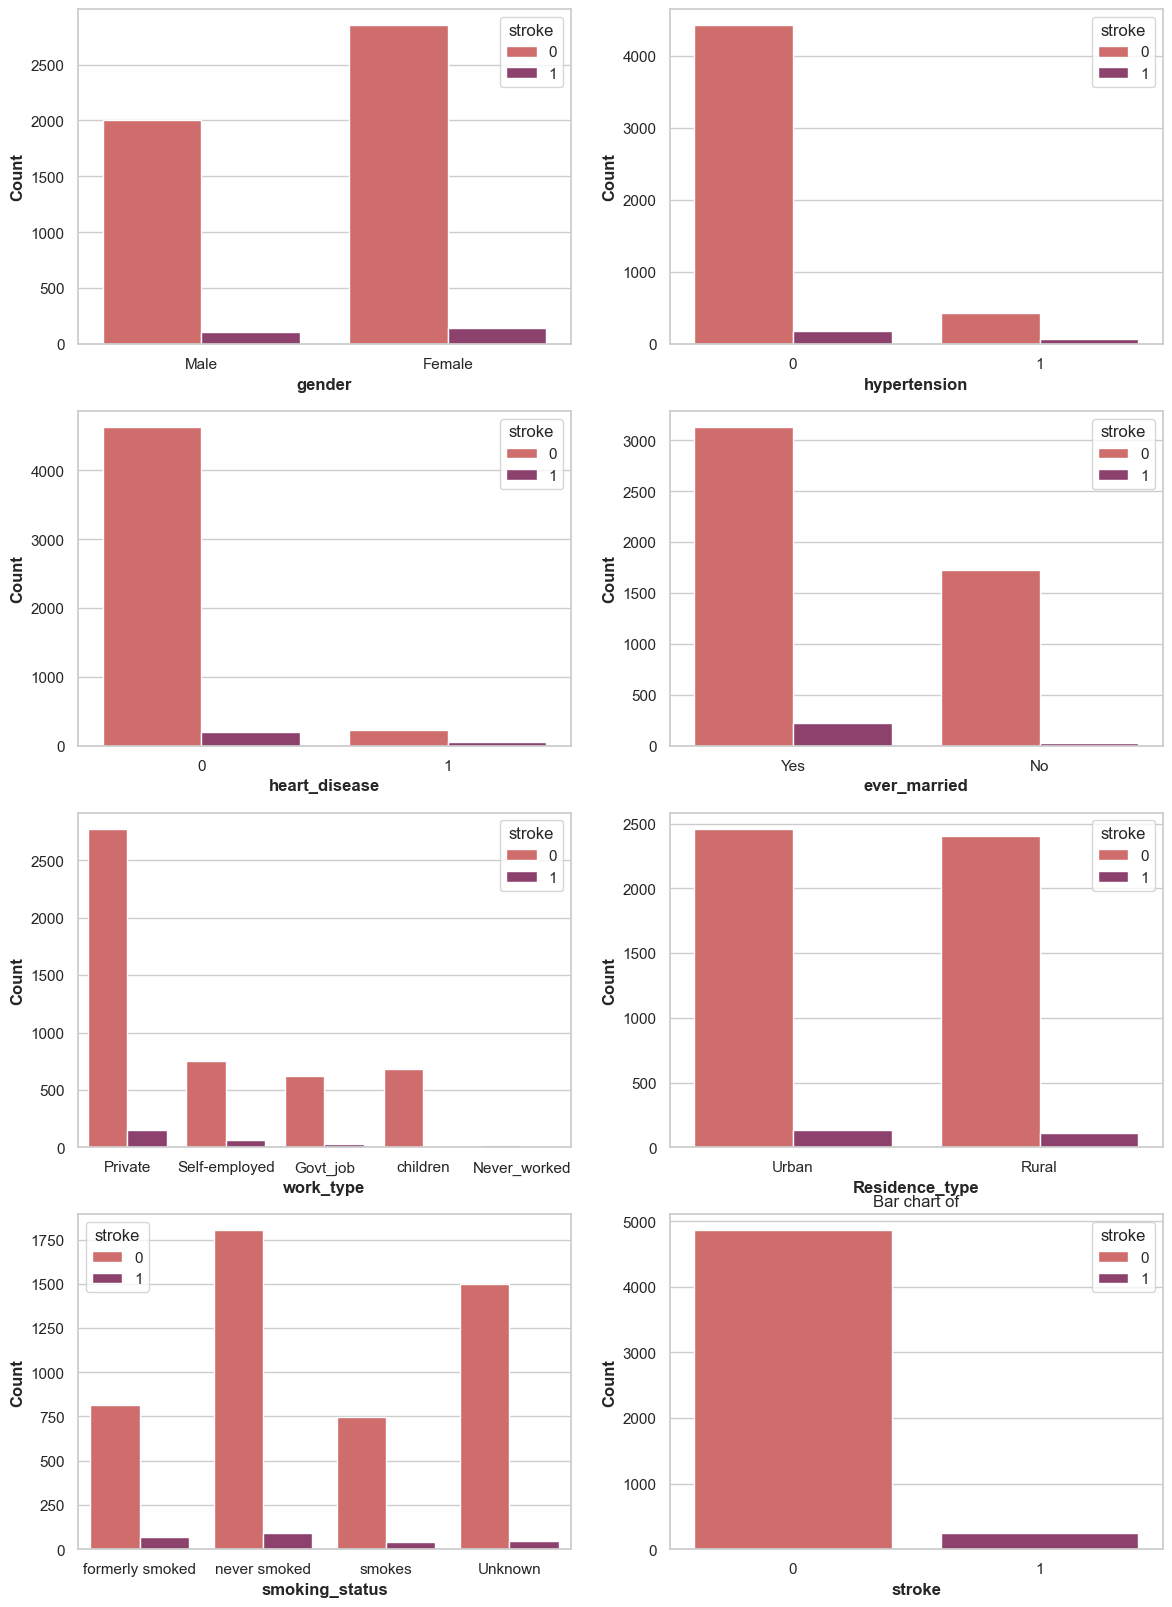

In [12]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

从上述计数图中可以直观地得出一些观察结果：
性别：女性数据较多，但似乎男性比例更大。
高血压：先前诊断为高血压的受试者有较高的中风风险。
心脏病：以前被诊断患有心脏病的受试者有很高的中风风险。
已婚者：已婚者患中风的风险很高。
工作类型：私人企业和自雇人士患中风的风险很高。
居住类型：与中风可能性无明显关系。
吸烟状况：吸烟或曾经吸烟会增加中风的风险。

#### 3.2 性别

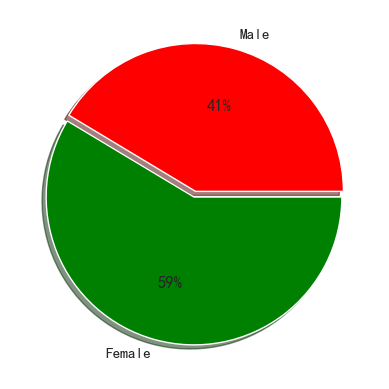

In [13]:
df1 = df.copy()
df1["bmi"].fillna(df["bmi"].median(skipna=True), inplace=True)
df1["bmi"]
df2 =pd.get_dummies(df1, columns=["ever_married","work_type","Residence_type","smoking_status"])
df2.head()
df2.isnull().sum()
sex = df1["gender"].value_counts(ascending=True)
M = sex["Male"]
F = sex["Female"]
data = (M,F)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.pie(data,labels=("Male","Female"),colors=("red","green"),explode=(0.02,0.02),shadow=True,autopct='%0.0f%%')
plt.show()

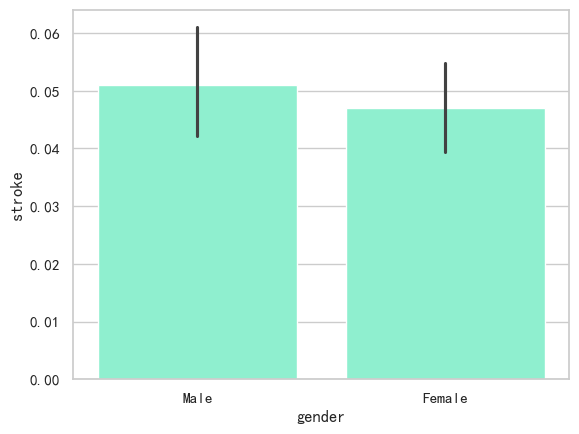

In [14]:
sns.barplot(x='gender', y='stroke', data=df1, color="aquamarine")
plt.show()

调查对象中女性较多，但是从比例来看，男性的脑中风率略高。

#### 3.2 年龄

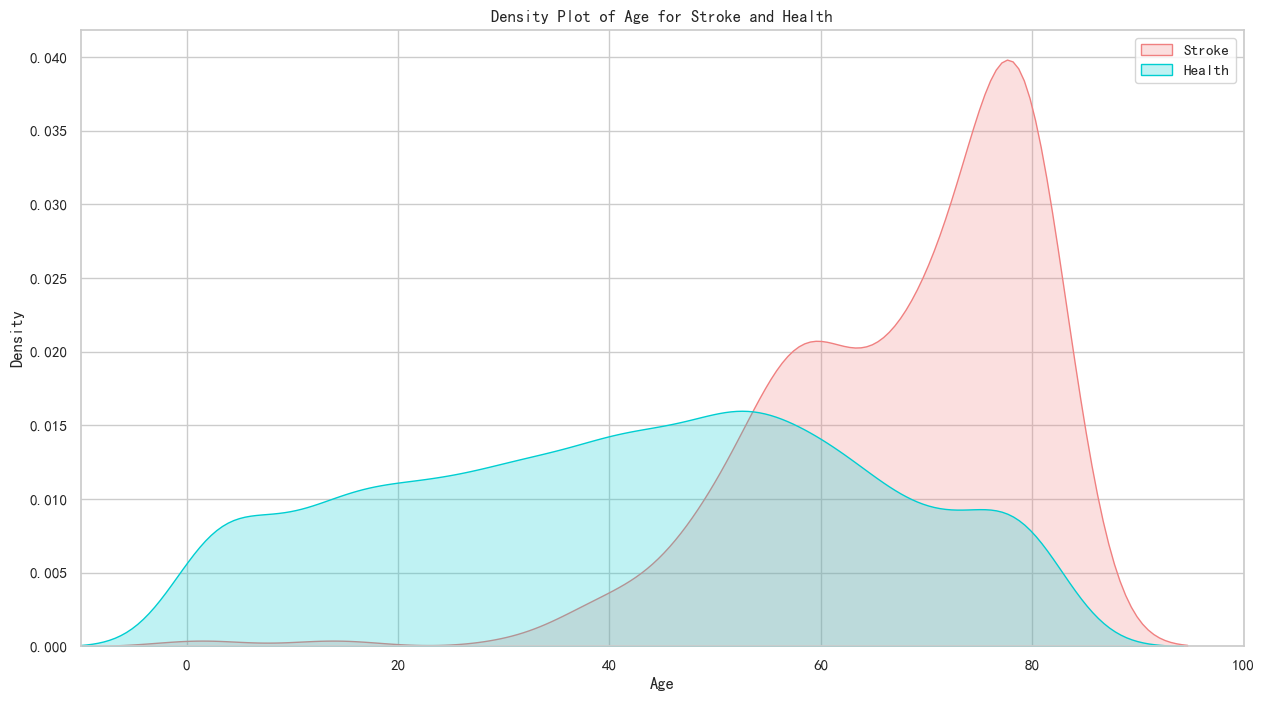

In [15]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df1["age"][df1.stroke == 1], color="lightcoral", shade=True)
sns.kdeplot(df1["age"][df1.stroke == 0], color="darkturquoise", shade=True)
plt.legend(['Stroke', 'Health'])
plt.title('Density Plot of Age for Stroke and Health')
ax.set(xlabel='Age')
plt.xlim(-10,100)
plt.show()

从分布图中可以看出，脑中风患者大多集中于60-80岁，40岁以下的人极少会脑中风，说明了年龄越大越有可能患脑中风。

#### 3.3 高血压

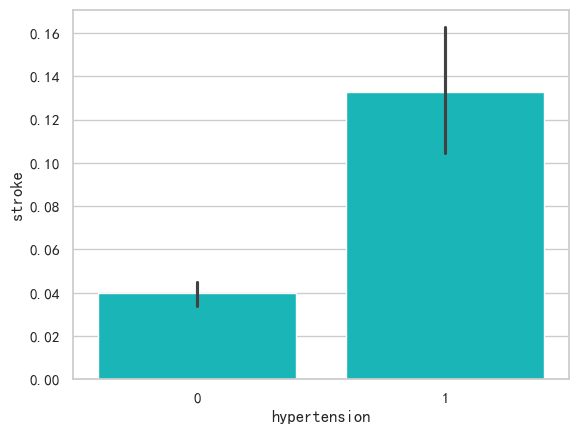

In [16]:
sns.barplot(x='hypertension', y='stroke', data=df1, color="darkturquoise")
plt.show()

大多数高血压患者也会患脑中风，说明这两种疾病存在一定相关性。

#### 3.4 心脏病

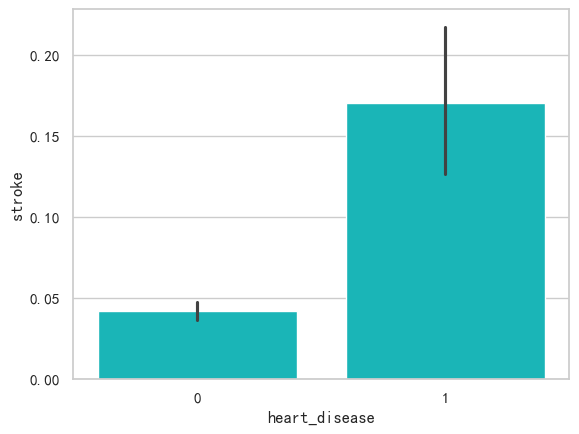

In [17]:
sns.barplot(x='heart_disease', y='stroke', data=df1, color="darkturquoise")
plt.show()

和高血压一样，大多数心脏病患者也会患脑中风。

#### 3.5 结婚

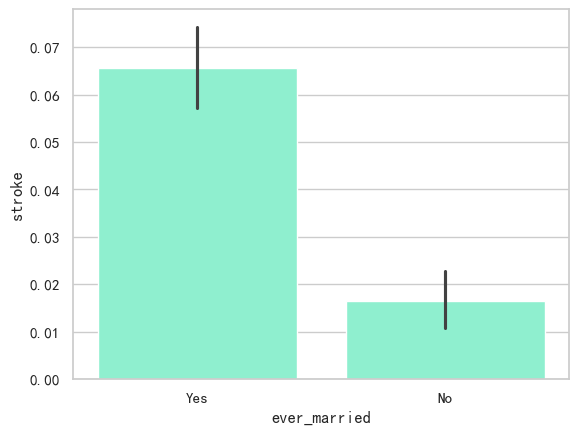

In [18]:
sns.barplot(x='ever_married', y='stroke', data=df1, color="aquamarine")
plt.show()

在所调查对象中，结过婚的人患脑中风更多。

#### 3.6 工作类型

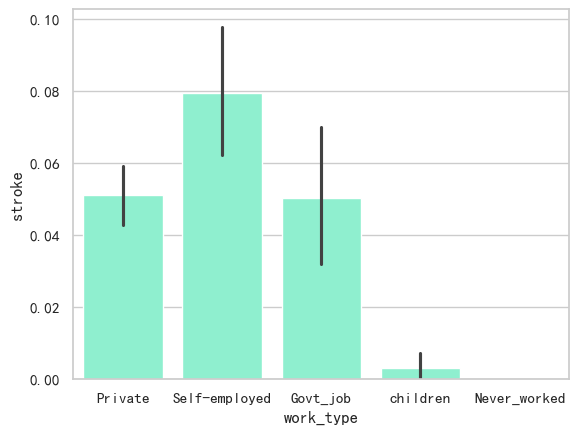

In [19]:
sns.barplot(x='work_type', y='stroke', data=df1, color="aquamarine")
plt.show()

从图中可以看出，Self-employed的人脑中风概率最大，其次为Private和Govt_job；children和Never_worked的人几乎没有患脑中风的。这也许意味着有社会工作且工作压力越大越容易患脑中风。

#### 3.7 地域类型

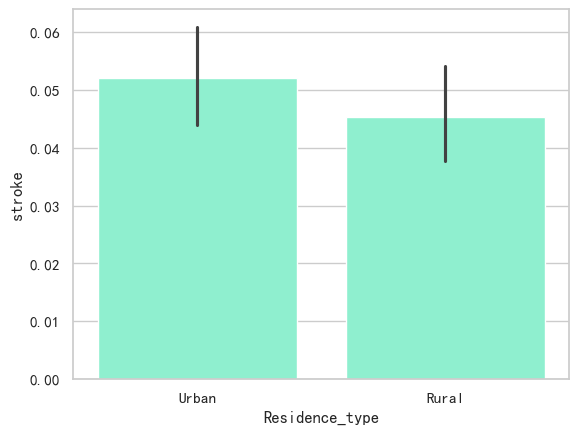

In [20]:
sns.barplot(x='Residence_type', y='stroke', data=df1, color="aquamarine")
plt.show()

调查对象中不同地域的人换脑中风的概率差不多，说明脑中风和地域并没有太大联系.

#### 3.8 平均血糖水平

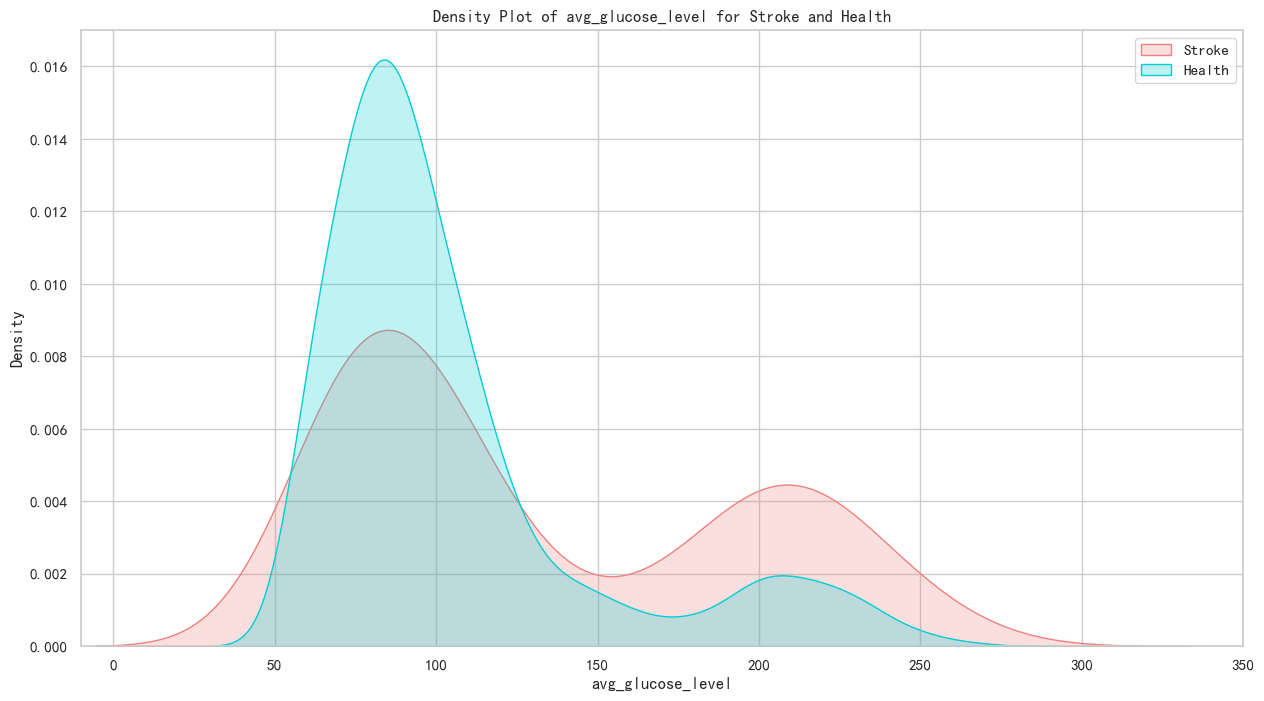

In [21]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df1["avg_glucose_level"][df1.stroke == 1], color="lightcoral", shade=True)
sns.kdeplot(df1["avg_glucose_level"][df1.stroke == 0], color="darkturquoise", shade=True)
plt.legend(['Stroke', 'Health'])
plt.title('Density Plot of avg_glucose_level for Stroke and Health')
ax.set(xlabel='avg_glucose_level')
plt.xlim(-10,350)
plt.show()

平均血糖水平在150-250之间时，中风比例明显高于正常比例，说明平均血糖水平与中风有较强相关性，平均血糖水平高易中风。

#### 3.9 bmi

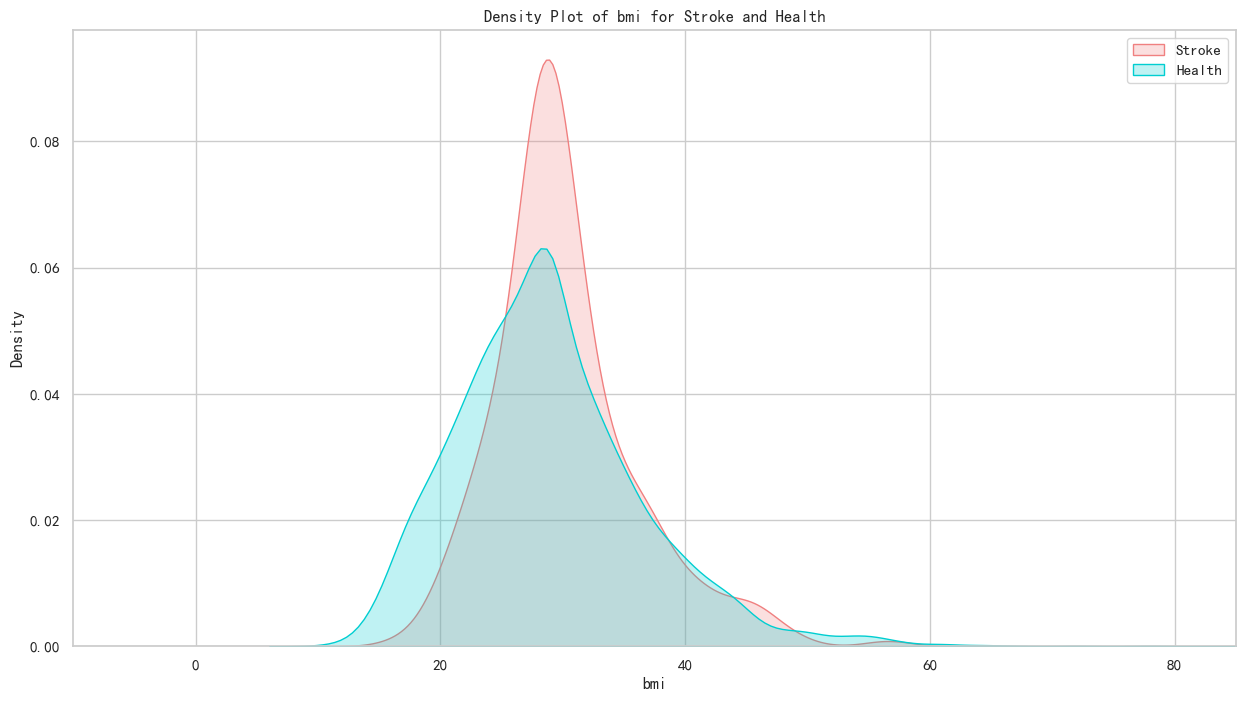

In [22]:
df["bmi"] = pd.to_numeric(df["bmi"])
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
#bmi指数没有给出中风可能性的太多指示。超重的bmi指数为50。此功能中的异常值应替换为其最高限制（50）。
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df1["bmi"][df1.stroke == 1], color="lightcoral", shade=True)
sns.kdeplot(df1["bmi"][df1.stroke == 0], color="darkturquoise", shade=True)
plt.legend(['Stroke', 'Health'])
plt.title('Density Plot of bmi for Stroke and Health')
ax.set(xlabel='bmi')
plt.xlim(-10,85)
plt.show()

基于体重指数发现，中风和健康群体的分布相似，说明是否患脑中风和体重指数的相关性不大。

#### 3.10 吸烟情况

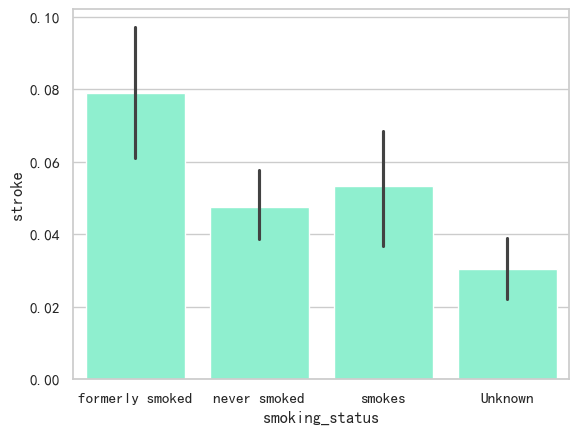

In [23]:
sns.barplot(x='smoking_status', y='stroke', data=df1, color="aquamarine")
plt.show()

显而易见，抽烟的人比不抽烟或者少抽烟的人患脑中风的可能性更大。

#### 3.11 相关性分析

<Axes: >

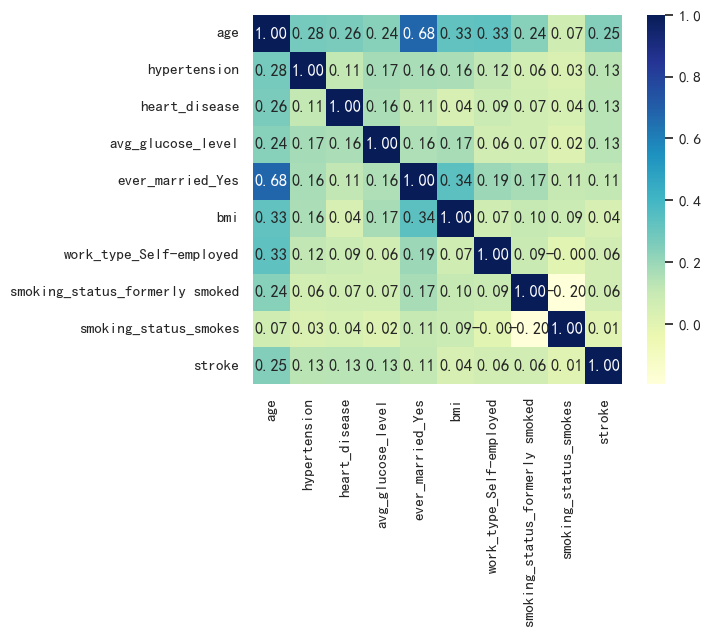

In [65]:
data = ["age","hypertension","heart_disease","avg_glucose_level","ever_married_Yes","bmi",
        "work_type_Self-employed","smoking_status_formerly smoked","smoking_status_smokes","stroke"]
data=df2[data]
corrmat=data.corr()
sns.heatmap(corrmat,annot=True,cmap="YlGnBu",linewidths=0.000001,fmt=".2f",square=True)

特征相关性：从上图可看出年龄、工作类型、婚姻状态、心脏病、高血压、吸烟状态具有相对较强的相关性

### 4.预测

将数据集分为训练和测试数据集用于检测模型效果

In [28]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_1
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0


In [29]:
df2.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,228.69,36.600000,1,1,False,True,...,False,True,False,False,False,True,False,True,False,False
1,Female,61.0,0,0,202.21,28.893237,1,0,False,True,...,False,False,True,False,True,False,False,False,True,False
2,Male,80.0,0,1,105.92,32.500000,1,1,False,True,...,False,True,False,False,True,False,False,False,True,False
3,Female,49.0,0,0,171.23,34.400000,1,0,False,True,...,False,True,False,False,False,True,False,False,False,True
4,Female,79.0,1,0,174.12,24.000000,1,0,False,True,...,False,False,True,False,True,False,False,False,True,False


In [30]:
#划分特征变量和目标变量
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

cols = ["age","hypertension","heart_disease","avg_glucose_level","bmi","gender_1","ever_married_No",
        "ever_married_Yes","work_type_Govt_job","work_type_Never_worked","work_type_Private",
        "work_type_Self-employed","work_type_children","smoking_status_Unknown",
        "smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]

X = df2[cols]
y = df2['stroke']

#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3723,65.0,0,0,99.12,29.0,1,False,True,False,False,True,False,False,False,True,False,False
3342,63.0,0,0,248.37,32.2,1,False,True,False,False,False,True,False,False,False,False,True
2223,27.0,0,0,226.75,28.9,0,True,False,False,False,True,False,False,True,False,False,False
3073,51.0,0,0,102.11,23.1,0,False,True,False,False,True,False,False,False,False,True,False
4120,42.0,0,0,108.96,27.5,0,False,True,False,False,True,False,False,False,False,True,False


In [31]:
#搭建模型
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = clf.predict(X_test)
print(y_pred[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [33]:
#放到一个DataFrame例进行查看比对
a = pd.DataFrame()  # 创建一个空DataFrame 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head(10)

,预测值,实际值
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [34]:
#查看全部的预测准确度
score = accuracy_score(y_pred, y_test)
print(score)

0.9500978473581213


In [35]:
#模型使用-预测概率
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[0:5]
a = pd.DataFrame(y_pred_proba, columns=['中风概率', '不中风概率'])
a.head()

,中风概率,不中风概率
0,0.993406,0.006594
1,0.843221,0.156779
2,0.907485,0.092515
3,0.991621,0.008379
4,0.991625,0.008375


In [36]:
#模型使用-预测概率
data3 = pd.read_csv('C:/Users/86157/Desktop/data2.csv')
data3['gender_1'] = le.fit_transform(data3["gender"].astype(str))
data3.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_1
0,NaN,Male,80,0,0,Yes,Private,Urban,128.69,30.6,formerly smoked,NaN,1
1,NaN,Male,62,0,1,Yes,Self-employed,Rural,80.21,35.0,never smoked,NaN,1
2,NaN,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,NaN,1
3,NaN,Female,49,0,0,Yes,Private,Urban,171.23,37.4,smokes,NaN,0
4,NaN,Female,78,1,1,Yes,Self-employed,Rural,170.12,24.0,never smoked,NaN,0


In [37]:
data3.id.nunique()
data3 = data3.drop(columns ='id')
data3.shape

(14, 12)

In [38]:
data1 = data3.copy()
data1["bmi"].fillna(data3["bmi"].median(skipna=True), inplace=True)
data1["bmi"]
data2 =pd.get_dummies(data1, columns=["ever_married","work_type","Residence_type","smoking_status"])
data2.head()
data2.isnull().sum()

gender                             0
age                                0
hypertension                       0
heart_disease                      0
avg_glucose_level                  0
bmi                                0
stroke                            14
gender_1                           0
ever_married_No                    0
ever_married_Yes                   0
ever_married_yes                   0
work_type_Govt_job                 0
work_type_Never_worked             0
work_type_Private                  0
work_type_Self-employed            0
work_type_children                 0
Residence_type_Rural               0
Residence_type_Urban               0
smoking_status_Unknown             0
smoking_status_formerly smoked     0
smoking_status_never smoked        0
smoking_status_smokes              0
dtype: int64

In [39]:
data2.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,80,0,0,128.69,30.6,NaN,1,False,True,...,False,True,False,False,False,True,False,True,False,False
1,Male,62,0,1,80.21,35.0,NaN,1,False,True,...,False,False,True,False,True,False,False,False,True,False
2,Male,80,0,1,105.92,32.5,NaN,1,False,True,...,False,True,False,False,True,False,False,False,True,False
3,Female,49,0,0,171.23,37.4,NaN,0,False,True,...,False,True,False,False,False,True,False,False,False,True
4,Female,78,1,1,170.12,24.0,NaN,0,False,True,...,False,False,True,False,True,False,False,False,True,False


In [40]:
# 提取特征变量
X_new = data2[cols]
# 使用训练好的模型进行预测
y_pred_new = clf.predict(X_new)
print(y_pred_new[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [41]:
# 使用训练好的模型对数据集进行中风概率预测
y_pred_proba = clf.predict_proba(X_new)
print(y_pred_proba[0:20])


[[0.7743975  0.2256025 ]
 [0.9564437  0.0435563 ]
 [0.78718263 0.21281737]
 [0.96261956 0.03738044]
 [0.76764361 0.23235639]
 [0.97608694 0.02391306]
 [0.8164666  0.1835334 ]
 [0.93732251 0.06267749]
 [0.95435196 0.04564804]
 [0.81958464 0.18041536]
 [0.99271434 0.00728566]
 [0.83629888 0.16370112]
 [0.99814571 0.00185429]
 [0.21075857 0.78924143]]


### 5.模型评估

5.1 Decision Tree决策树

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=123) 
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [60]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree=cross_val_score(decision_tree,X,y, cv=10, scoring='accuracy').mean()
acc_decision_tree

0.9119373776908024

In [46]:
model.feature_importances_
# 通过DataFrame进行展示，并根据重要性进行倒序排列
features = X.columns  
importances = model.feature_importances_  

# 通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)
print(importances_df.sort_values('特征重要性', ascending=False))


                              特征名称     特征重要性
0                              age  0.825979
4                              bmi  0.067259
3                avg_glucose_level  0.057250
2                    heart_disease  0.049513
11         work_type_Self-employed  0.000000
17     smoking_status_never smoked  0.000000
16  smoking_status_formerly smoked  0.000000
15          smoking_status_Unknown  0.000000
14            Residence_type_Urban  0.000000
13            Residence_type_Rural  0.000000
12              work_type_children  0.000000
9           work_type_Never_worked  0.000000
10               work_type_Private  0.000000
1                     hypertension  0.000000
8               work_type_Govt_job  0.000000
7                 ever_married_Yes  0.000000
6                  ever_married_No  0.000000
5                         gender_1  0.000000
18           smoking_status_smokes  0.000000


决策树模型.png已经保存在代码所在文件夹！
决策树模型.pdf已经保存在代码所在文件夹！


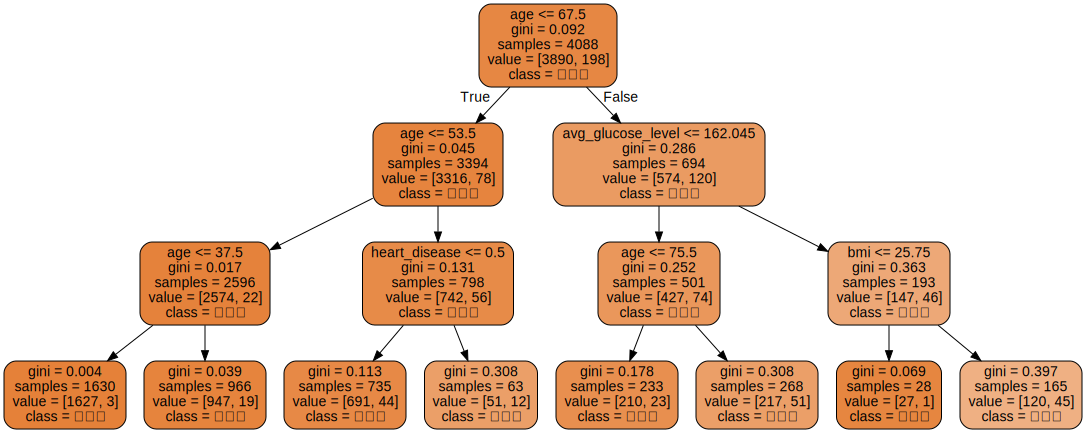

In [47]:
from sklearn.tree import export_graphviz
import graphviz
import os  # 手动进行环境变量配置，防止在本机环境的变量部署失败
os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

# 生成dot_data
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=['不中风', '中风'], rounded=True, filled=True)

# 将生成的dot_data内容导入到txt文件中
f = open('dot_data.txt', 'w')
f.write(dot_data)
f.close()

# 修改字体设置，避免中文乱码
import re
f_old = open('dot_data.txt', 'r')
f_new = open('dot_data_new.txt', 'w', encoding='utf-8')
for line in f_old:
    if 'fontname' in line:
        font_re = 'fontname=(.*?)]'
        old_font = re.findall(font_re, line)[0]
        line = line.replace(old_font, 'SimHei')
    f_new.write(line)
f_old.close()
f_new.close()

# 以PNG的图片形式存储生成的可视化文件
os.system('dot -Tpng dot_data_new.txt -o 决策树模型.png')  
print('决策树模型.png已经保存在代码所在文件夹！')

# 以PDF的形式存储生成的可视化文件
os.system('dot -Tpdf dot_data_new.txt -o 决策树模型.pdf')  
print('决策树模型.pdf已经保存在代码所在文件夹！')
graph = graphviz.Source(dot_data)

graph

5.2 KNN - K近邻

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn=cross_val_score(knn,X,y, cv=10, scoring='accuracy').mean()
acc_knn

0.9379647749510763

5.3 Linear SVC

In [52]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc=cross_val_score(linear_svc,X,y, cv=10, scoring='accuracy').mean()
acc_linear_svc

0.8974559686888455

5.4 MLPClassifier - 神经网络

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp

MLPClassifier()

In [54]:
mlp = MLPClassifier(hidden_layer_sizes=(10,))
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
acc_mlp=cross_val_score(mlp,X,y, cv=10, scoring='accuracy').mean()
acc_mlp

0.9514677103718199

In [61]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Linear SVC', 'Decision Tree',"MLPClassifier"],
    'Score': [acc_knn, acc_linear_svc, acc_decision_tree,acc_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,MLPClassifier,0.951468
0,KNN,0.937965
2,Decision Tree,0.911937
1,Linear SVC,0.897456
